In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split

In [4]:
files = [file for file in os.listdir ('./EPL_teams_2223')]
EPL_2223=pd.DataFrame()
for file in files:
    df= pd.read_csv(os.path.join("./EPL_teams_2223", file)) # This line!
    EPL_2223= pd.concat ([EPL_2223, df], ignore_index=True)
EPL_2223.to_csv("EPL_2223.csv",index= False)
EPL_2223.shape

(760, 87)

In [5]:
files = [file for file in os.listdir ('./EPL_teams_2122')]
EPL_2122=pd.DataFrame()
for file in files:
    df= pd.read_csv(os.path.join("./EPL_teams_2122", file)) # This line!
    EPL_2122= pd.concat ([EPL_2122, df], ignore_index=True)
EPL_2122.to_csv("EPL_2122.csv",index= False)

EPL_2122.shape

(760, 87)

In [6]:
files = [file for file in os.listdir ('./EPL_teams_2021')]
EPL_2021=pd.DataFrame()
for file in files:
    df= pd.read_csv(os.path.join("./EPL_teams_2021", file)) # This line!
    EPL_2021= pd.concat ([EPL_2021, df], ignore_index=True)
EPL_2021.to_csv("EPL_2021.csv",index= False)

EPL_2021.columns


Index(['Rk', 'Team', 'Date', 'Opp', 'Comp', 'Result', 'GF', 'GA', 'GD', 'Poss',
       'G-PK', 'PK', 'PKatt', 'PKm', 'Cmp', 'Att', 'Cmp%', 'KP', '1/3', 'PPA',
       'CrsPA', 'PrgP', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1',
       'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Tkl', 'TklW',
       'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att.4', 'Tkl%', 'Lost',
       'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'xG', 'npxG',
       'xGD', 'npxGD', 'xAG', 'xA', 'G-xG', 'np:G-xG', 'A-xAG', 'npxG/Sh',
       'Sh.1', 'G/Sh', 'G/SoT', 'SoT', 'SoT%', 'Dist', 'FK', 'PSxG',
       'PSxG/SoT', 'PSxG+/-', 'Touches', 'Def Pen', 'Def 3rd.1', 'Mid 3rd.1',
       'Att 3rd.1', 'Att Pen', 'Live', 'Carries', 'TotDist.1', 'PrgDist.1',
       'PrgC', '1/3.1', 'CPA', 'Mis', 'Dis', 'Rec', 'PrgR', 'Match Report'],
      dtype='object')

In [7]:
files = [file for file in os.listdir ('./EPL_teams_1920')]
EPL_1920=pd.DataFrame()
for file in files:
    df= pd.read_csv(os.path.join("./EPL_teams_1920", file)) # This line!
    EPL_1920= pd.concat ([EPL_1920, df], ignore_index=True)
EPL_1920.to_csv("EPL_1920.csv",index= False)

EPL_1920.columns

Index(['Rk', 'Team', 'Date', 'Opp', 'Comp', 'Result', 'GF', 'GA', 'GD', 'Poss',
       'G-PK', 'PK', 'PKatt', 'PKm', 'Cmp', 'Att', 'Cmp%', 'KP', '1/3', 'PPA',
       'CrsPA', 'PrgP', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1',
       'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Tkl', 'TklW',
       'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att.4', 'Tkl%', 'Lost',
       'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'xG', 'npxG',
       'xGD', 'npxGD', 'xAG', 'xA', 'G-xG', 'np:G-xG', 'A-xAG', 'npxG/Sh',
       'Sh.1', 'G/Sh', 'G/SoT', 'SoT', 'SoT%', 'Dist', 'FK', 'PSxG',
       'PSxG/SoT', 'PSxG+/-', 'Touches', 'Def Pen', 'Def 3rd.1', 'Mid 3rd.1',
       'Att 3rd.1', 'Att Pen', 'Live', 'Carries', 'TotDist.1', 'PrgDist.1',
       'PrgC', '1/3.1', 'CPA', 'Mis', 'Dis', 'Rec', 'PrgR', 'Match Report'],
      dtype='object')

# CONCAT TABLES 20/21-22/23

In [8]:
df_EPL = pd.concat([EPL_2223, EPL_2122, EPL_2021], ignore_index=True)

df_EPL.fillna(0, inplace=True)
df_EPL = df_EPL.drop(['Rk', 'Comp', 'Match Report'], axis=1)
df_EPL

,Team,Date,Opp,Result,GF,GA,GD,Poss,G-PK,PK,...,Carries,TotDist.1,PrgDist.1,PrgC,1/3.1,CPA,Mis,Dis,Rec,PrgR
0,Arsenal,2023-05-28,Wolves,W 5-0,5,0,5,51,5,0,...,341,1815,998,20,14,8,10,5,410,44
1,Arsenal,2023-05-20,Nott'ham Forest,L 0-1,0,1,-1,81,0,0,...,583,3252,2012,30,25,5,16,11,656,71
2,Arsenal,2023-05-14,Brighton,L 0-3,0,3,-3,41,0,0,...,269,1281,704,14,8,10,9,11,286,27
3,Arsenal,2023-05-07,Newcastle Utd,W 2-0,2,0,2,45,1,0,...,266,1236,563,16,12,3,20,11,286,26
4,Arsenal,2023-05-02,Chelsea,W 3-1,3,1,2,55,3,0,...,415,1891,911,17,12,9,8,9,481,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,Wolves,2020-10-19,Leeds United,W 1-0,1,0,1,34,1,0,...,155,1130,603,16,10,4,20,8,203,25
2276,Wolves,2020-10-04,Fulham,W 1-0,1,0,1,48,1,0,...,409,1748,974,11,13,4,9,6,439,27
2277,Wolves,2020-09-27,West Ham,L 0-4,0,4,-4,63,0,0,...,481,2613,1349,27,19,2,17,13,574,44
2278,Wolves,2020-09-21,Manchester City,L 1-3,1,3,-2,35,1,0,...,285,1410,717,17,12,4,14,12,288,24


In [9]:
for i, row in df_EPL.iterrows():
    string = row['Result']
    if string[0] == 'W':
        df_EPL.loc[i, 'Result'] = 'W'
    if string[0] == 'L':
        df_EPL.loc[i, 'Result'] = 'L'
    if string[0] == 'D':
        df_EPL.loc[i, 'Result'] = 'D'

df_EPL["Result"] = df_EPL["Result"].map({"W" : 0 , "L" : 2, "D": 1})

In [10]:
df_EPL.columns

Index(['Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK', 'PK',
       'PKatt', 'PKm', 'Cmp', 'Att', 'Cmp%', 'KP', '1/3', 'PPA', 'CrsPA',
       'PrgP', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2',
       'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Tkl', 'TklW', 'Def 3rd',
       'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att.4', 'Tkl%', 'Lost', 'Blocks', 'Sh',
       'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'xG', 'npxG', 'xGD', 'npxGD',
       'xAG', 'xA', 'G-xG', 'np:G-xG', 'A-xAG', 'npxG/Sh', 'Sh.1', 'G/Sh',
       'G/SoT', 'SoT', 'SoT%', 'Dist', 'FK', 'PSxG', 'PSxG/SoT', 'PSxG+/-',
       'Touches', 'Def Pen', 'Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1', 'Att Pen',
       'Live', 'Carries', 'TotDist.1', 'PrgDist.1', 'PrgC', '1/3.1', 'CPA',
       'Mis', 'Dis', 'Rec', 'PrgR'],
      dtype='object')

['Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PG',
           'PG', 'PKatt', 'PKm', 'OPcmp', 'OPatt', 'OP%', 'KP', 'OP2fin', 'OP2pa', 'C2pa',
           'OPprg', 'OPdist', 'OPprgdist', 'SPcmp', 'SPatt', 'SP%', 'MPcmp',
           'MPatt', 'MP%', 'LPcmp', 'LPatt', 'LP%', 'Tkl', 'TklW', 'Tkldef', 'Tklmid', 'Tkloff',
           'DTkl', 'Dtkl', 'DTkl%', 'LostTkl', 'Blocks', 'BS', 'BP', 'Int',
           'TklInt', 'Clr', 'Err', 'xG', 'npxG', 'xGD', 'npxGD', 'xAG', 'xA', 'G-xG',
           'npG-npxG', 'A-xAG', 'npxG/S', 'TotS', 'G/S', 'G/SoT', 'SoT', 'SoT%',
           'Sdist', 'FK', 'PSxG', 'PSxG/SoT',
           'PSxG-GA', 'Touches', 'Tdefpa', 'Tdef', 'Tmid',
           'Toff', 'Toffpa', 'Tlive', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg', 'Carr2fin',
           'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR']


In [11]:
df_EPL.columns =['Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PG',
           'PG', 'PKatt', 'PKm', 'OPcmp', 'OPatt', 'OP%', 'KP', 'OP2fin', 'OP2pa', 'C2pa',
           'OPprg', 'OPdist', 'OPprgdist', 'SPcmp', 'SPatt', 'SP%', 'MPcmp',
           'MPatt', 'MP%', 'LPcmp', 'LPatt', 'LP%', 'Tkl', 'TklW', 'Tkldef', 'Tklmid', 'Tkloff',
           'DTkl', 'Dtkl', 'DTkl%', 'LostTkl', 'Blocks', 'BS', 'BP', 'Int',
           'TklInt', 'Clr', 'Err', 'xG', 'npxG', 'xGD', 'npxGD', 'xAG', 'xA', 'G-xG',
           'npG-npxG', 'A-xAG', 'npxG/S', 'TotS', 'G/S', 'G/SoT', 'SoT', 'SoT%',
           'Sdist', 'FK', 'PSxG', 'PSxG/SoT',
           'PSxG-GA', 'Touches', 'Tdefpa', 'Tdef', 'Tmid',
           'Toff', 'Toffpa', 'Tlive', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg', 'Carr2fin',
           'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR']
df_EPL

,Team,Date,Opp,Result,GF,GA,GD,Poss,G-PG,PG,...,Carr,CarrDist,CarrPrgDist,CarrPrg,Carr2fin,Carr2pa,CarrF,CarrD,Rec,PrgR
0,Arsenal,2023-05-28,Wolves,0,5,0,5,51,5,0,...,341,1815,998,20,14,8,10,5,410,44
1,Arsenal,2023-05-20,Nott'ham Forest,2,0,1,-1,81,0,0,...,583,3252,2012,30,25,5,16,11,656,71
2,Arsenal,2023-05-14,Brighton,2,0,3,-3,41,0,0,...,269,1281,704,14,8,10,9,11,286,27
3,Arsenal,2023-05-07,Newcastle Utd,0,2,0,2,45,1,0,...,266,1236,563,16,12,3,20,11,286,26
4,Arsenal,2023-05-02,Chelsea,0,3,1,2,55,3,0,...,415,1891,911,17,12,9,8,9,481,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,Wolves,2020-10-19,Leeds United,0,1,0,1,34,1,0,...,155,1130,603,16,10,4,20,8,203,25
2276,Wolves,2020-10-04,Fulham,0,1,0,1,48,1,0,...,409,1748,974,11,13,4,9,6,439,27
2277,Wolves,2020-09-27,West Ham,2,0,4,-4,63,0,0,...,481,2613,1349,27,19,2,17,13,574,44
2278,Wolves,2020-09-21,Manchester City,2,1,3,-2,35,1,0,...,285,1410,717,17,12,4,14,12,288,24


In [12]:
df_EPL.to_csv("EPL.csv",index= False)

# RANDOM FOREST

In [13]:
X = df_EPL.drop(columns=['Date', 'Result', 'GF', 'GA', 'GD', 'G-PG', 'PG', 'PKatt',
                         'PKm', 'G-xG', 'npG-npxG', 'A-xAG', 'PSxG-GA', 'G/S', 'G/SoT'], axis=1)

y = df_EPL['GF']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_test

,Team,Opp,Poss,OPcmp,OPatt,OP%,KP,OP2fin,OP2pa,C2pa,...,Carr,CarrDist,CarrPrgDist,CarrPrg,Carr2fin,Carr2pa,CarrF,CarrD,Rec,PrgR
1677,Chelsea,West Ham,55,497,603,82.4,14,41,8,2,...,455,2009,1022,21,16,10,18,11,496,42
1533,Arsenal,Manchester City,45,424,509,83.3,4,21,8,2,...,391,1840,1000,13,11,4,19,1,422,29
1890,Leicester City,Fulham,68,599,715,83.8,9,43,10,2,...,483,2718,1391,14,13,0,11,13,597,43
148,Brentford,Everton,58,464,576,80.6,14,33,12,5,...,474,1988,1066,19,16,2,9,14,463,39
1988,Manchester Utd,Chelsea,43,396,492,80.5,9,23,3,0,...,352,2013,1106,22,14,1,15,14,389,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,West Ham,Newcastle Utd,54,431,522,82.6,12,28,11,0,...,365,2122,1207,29,17,7,16,4,429,42
1136,Leicester City,Manchester City,39,322,402,80.1,5,13,4,2,...,279,1374,741,14,8,3,20,8,322,20
711,West Ham,Liverpool,46,442,551,80.2,5,34,4,1,...,344,1602,675,8,7,3,14,9,437,34
1175,Liverpool,Chelsea,65,631,758,83.2,16,58,16,5,...,442,2365,1287,25,33,4,17,18,627,69


In [14]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Team', 'Opp'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

from sklearn.preprocessing import StandardScaler
sta = StandardScaler()
X_train = sta.fit_transform(X_train)
X_test = sta.transform(X_test)

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [15]:
rfc = RandomForestClassifier(bootstrap=False, max_depth=25, max_features=15)
rfc.fit(X_train, y_train)

# Evaluating on Training set
y_pred_train = rfc.predict_proba(X_train)
#print(classification_report(y_train, y_pred_train))

In [16]:
y_pred_test = rfc.predict_proba(X_test)
#print(classification_report(y_test, y_pred_test))

In [17]:
y_pred_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
y_pred_test

array([[0.  , 0.16, 0.51, ..., 0.03, 0.01, 0.  ],
       [0.74, 0.25, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.47, 0.23, 0.19, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.19, 0.46, 0.25, ..., 0.  , 0.  , 0.  ],
       [0.12, 0.48, 0.22, ..., 0.  , 0.  , 0.  ],
       [0.21, 0.48, 0.23, ..., 0.  , 0.  , 0.  ]])

In [19]:
rfc.feature_importances_

array([0.01256027, 0.01401934, 0.00994434, 0.00945708, 0.00993787,
       0.01497671, 0.01106359, 0.01364331, 0.01153037, 0.00925807,
       0.01113904, 0.01116948, 0.01341119, 0.01206402, 0.01264934,
       0.01747357, 0.01063438, 0.01084191, 0.01779211, 0.01317665,
       0.01884607, 0.0170443 , 0.01254728, 0.01146186, 0.01298748,
       0.01144495, 0.00846647, 0.01026534, 0.01244338, 0.01862012,
       0.01219713, 0.01240019, 0.00935277, 0.01180757, 0.0119603 ,
       0.01171174, 0.0173322 , 0.00378405, 0.05272524, 0.02730603,
       0.0274384 , 0.01647839, 0.01727783, 0.0121347 , 0.01910167,
       0.01124273, 0.0357837 , 0.04227529, 0.01714686, 0.0035812 ,
       0.0151857 , 0.01792192, 0.00923297, 0.01878877, 0.01576474,
       0.00637381, 0.01479224, 0.0141093 , 0.00910193, 0.01192515,
       0.01266145, 0.01338318, 0.01331268, 0.01297792, 0.01150515,
       0.0124232 , 0.01549272, 0.00955195, 0.01158736])

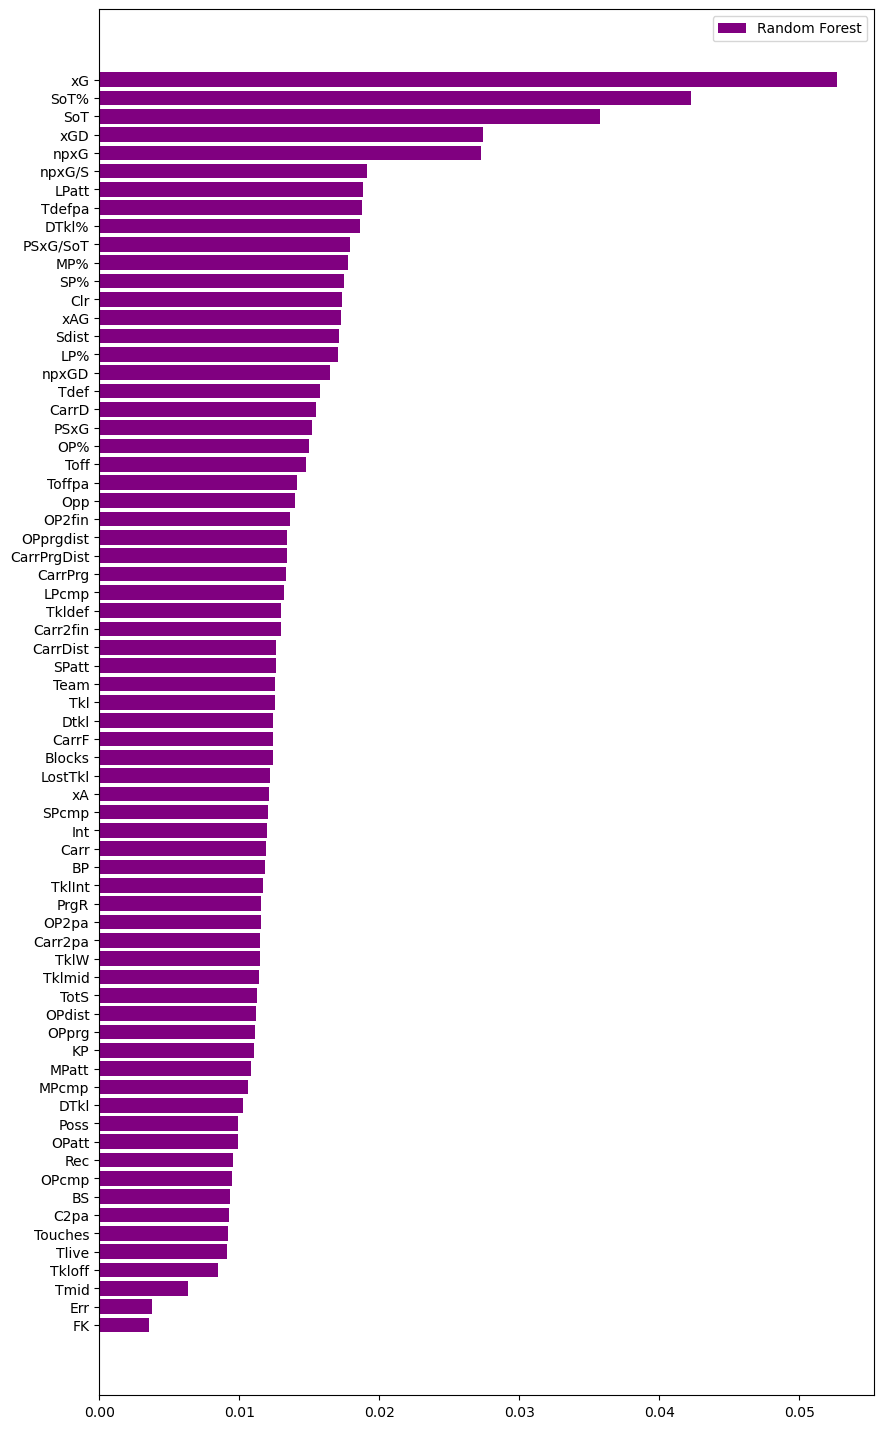

In [20]:
feature_importance = pd.DataFrame({'rfc':rfc.feature_importances_},index = df_EPL.drop(columns=['Date', 'Result',
                                  'GF', 'GA', 'GD', 'G-PG', 'PG', 'PKatt','PKm', 'G-xG', 'npG-npxG', 'A-xAG', 'PSxG-GA',
                                  'G/S', 'G/SoT']).columns)
feature_importance.sort_values('rfc',ascending = True,inplace = True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize = (10,18))
rfc_feature = ax.barh(index, feature_importance['rfc'], color = 'purple', label = 'Random Forest')
ax.set(yticks = index , yticklabels = feature_importance.index)

ax.legend()
plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()

# ADDING OPP STATS

Features for opps to consider:\
OPP_xG\
OPP_npxG\
OPP_PSxG\
OPP_SoT%\
OPP_PSxG/SoT\
OPP_Clr\
OPP_xAG\
OPP_SoT\
OPP_Tdefpa\
OPP_npxG/S\
OPP_C2pa\
OPP_MP%\
OPP_LPatt\
OPP_Sdist\
OPP_DTkl%\
OPP_OP%\
OPP_SP%\
OPP_Tdef\
OPP_Toff\
OPP_LP%\
OPP_Carr2pa

In [22]:
'''newfeatures = ['OPP_xG', 'OPP_npxG', 'OPP_PSxG', 'OPP_SoT%','OPP_PSxG/SoT','OPP_Clr','OPP_xAG','OPP_SoT','OPP_Tdefpa','OPP_npxG/S',
               'OPP_C2pa','OPP_MP%','OPP_LPatt','OPP_Sdist','OPP_DTkl%','OPP_OP%','OPP_SP%','OPP_Tdef',
               'OPP_Toff','OPP_LP%','OPP_Carr2pa']

df_EPL_opp = df_EPL.copy()

for i in newfeatures:
    df[i] = ''

for j, row in df_EPL.iterrows():
    for k, r in df_EPL.iterrows():
        if row['Team'] == r['Opp'] and row['Date'] == r['Date']:
            for i in newfeatures:
                df_EPL_opp.loc[k, i] = df_EPL_opp.loc[j, i[4:]]
            continue'''
#df_EPL_opp.to_csv("EPL_opp.csv",index= False)

"newfeatures = ['OPP_xG', 'OPP_npxG', 'OPP_PSxG', 'OPP_SoT%','OPP_PSxG/SoT','OPP_Clr','OPP_xAG','OPP_SoT','OPP_Tdefpa','OPP_npxG/S',\n               'OPP_C2pa','OPP_MP%','OPP_LPatt','OPP_Sdist','OPP_DTkl%','OPP_OP%','OPP_SP%','OPP_Tdef',\n               'OPP_Toff','OPP_LP%','OPP_Carr2pa']\n\ndf_EPL_opp = df_EPL.copy()\n\nfor i in newfeatures:\n    df[i] = ''\n\nfor j, row in df_EPL.iterrows():\n    for k, r in df_EPL.iterrows():\n        if row['Team'] == r['Opp'] and row['Date'] == r['Date']:\n            for i in newfeatures:\n                df_EPL_opp.loc[k, i] = df_EPL_opp.loc[j, i[4:]]\n            continue"

In [23]:
df_EPL_opp = pd.read_csv("EPL_opp.csv", sep = ",")

# Random forest with opp

In [24]:
X_opp = df_EPL_opp.drop(columns=['Date', 'Result', 'GF', 'GA', 'GD', 'G-PG', 'PG', 'PKatt',
                         'PKm', 'G-xG', 'npG-npxG', 'A-xAG', 'PSxG-GA', 'G/S', 'G/SoT', 'Poss'], axis=1)

y_opp = df_EPL_opp['GF']


X_train_opp, X_test_opp, y_train_opp, y_test_opp = train_test_split(X_opp, y_opp, test_size = 0.3, random_state = 0)
X_train_opp.columns

Index(['Team', 'Opp', 'OPcmp', 'OPatt', 'OP%', 'KP', 'OP2fin', 'OP2pa', 'C2pa',
       'OPprg', 'OPdist', 'OPprgdist', 'SPcmp', 'SPatt', 'SP%', 'MPcmp',
       'MPatt', 'MP%', 'LPcmp', 'LPatt', 'LP%', 'Tkl', 'TklW', 'Tkldef',
       'Tklmid', 'Tkloff', 'DTkl', 'Dtkl', 'DTkl%', 'LostTkl', 'Blocks', 'BS',
       'BP', 'Int', 'TklInt', 'Clr', 'Err', 'xG', 'npxG', 'xGD', 'npxGD',
       'xAG', 'xA', 'npxG/S', 'TotS', 'SoT', 'SoT%', 'Sdist', 'FK', 'PSxG',
       'PSxG/SoT', 'Touches', 'Tdefpa', 'Tdef', 'Tmid', 'Toff', 'Toffpa',
       'Tlive', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg', 'Carr2fin',
       'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR', 'OPP_xG', 'OPP_npxG',
       'OPP_PSxG', 'OPP_SoT%', 'OPP_PSxG/SoT', 'OPP_Clr', 'OPP_xAG', 'OPP_SoT',
       'OPP_Tdefpa', 'OPP_npxG/S', 'OPP_C2pa', 'OPP_MP%', 'OPP_LPatt',
       'OPP_Sdist', 'OPP_DTkl%', 'OPP_OP%', 'OPP_SP%', 'OPP_Tdef', 'OPP_Toff',
       'OPP_LP%', 'OPP_Carr2pa'],
      dtype='object')

In [25]:
encoder = ce.OrdinalEncoder(cols=['Team', 'Opp'])
X_train_opp = encoder.fit_transform(X_train_opp)
X_test_opp = encoder.transform(X_test_opp)

X_train_opp = sta.fit_transform(X_train_opp)
X_test_opp = sta.transform(X_test_opp)

In [26]:
rfc_opp = RandomForestClassifier(bootstrap=False, max_depth=25, max_features=15)
rfc_opp.fit(X_train_opp, y_train_opp)

# Evaluating on Training set
y_pred_train_opp = rfc_opp.predict_proba(X_train_opp)
#print(classification_report(y_train_opp, y_pred_train_opp))

In [27]:
y_pred_train_opp

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
y_pred_test_opp = rfc_opp.predict_proba(X_test_opp)
#print(classification_report(y_test_opp, y_pred_test_opp))

In [29]:
y_pred_test_opp

array([[0.02, 0.1 , 0.53, ..., 0.01, 0.  , 0.  ],
       [0.8 , 0.14, 0.06, ..., 0.  , 0.  , 0.  ],
       [0.48, 0.3 , 0.14, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.16, 0.25, 0.43, ..., 0.  , 0.  , 0.  ],
       [0.07, 0.53, 0.23, ..., 0.  , 0.  , 0.  ],
       [0.24, 0.46, 0.24, ..., 0.  , 0.  , 0.  ]])

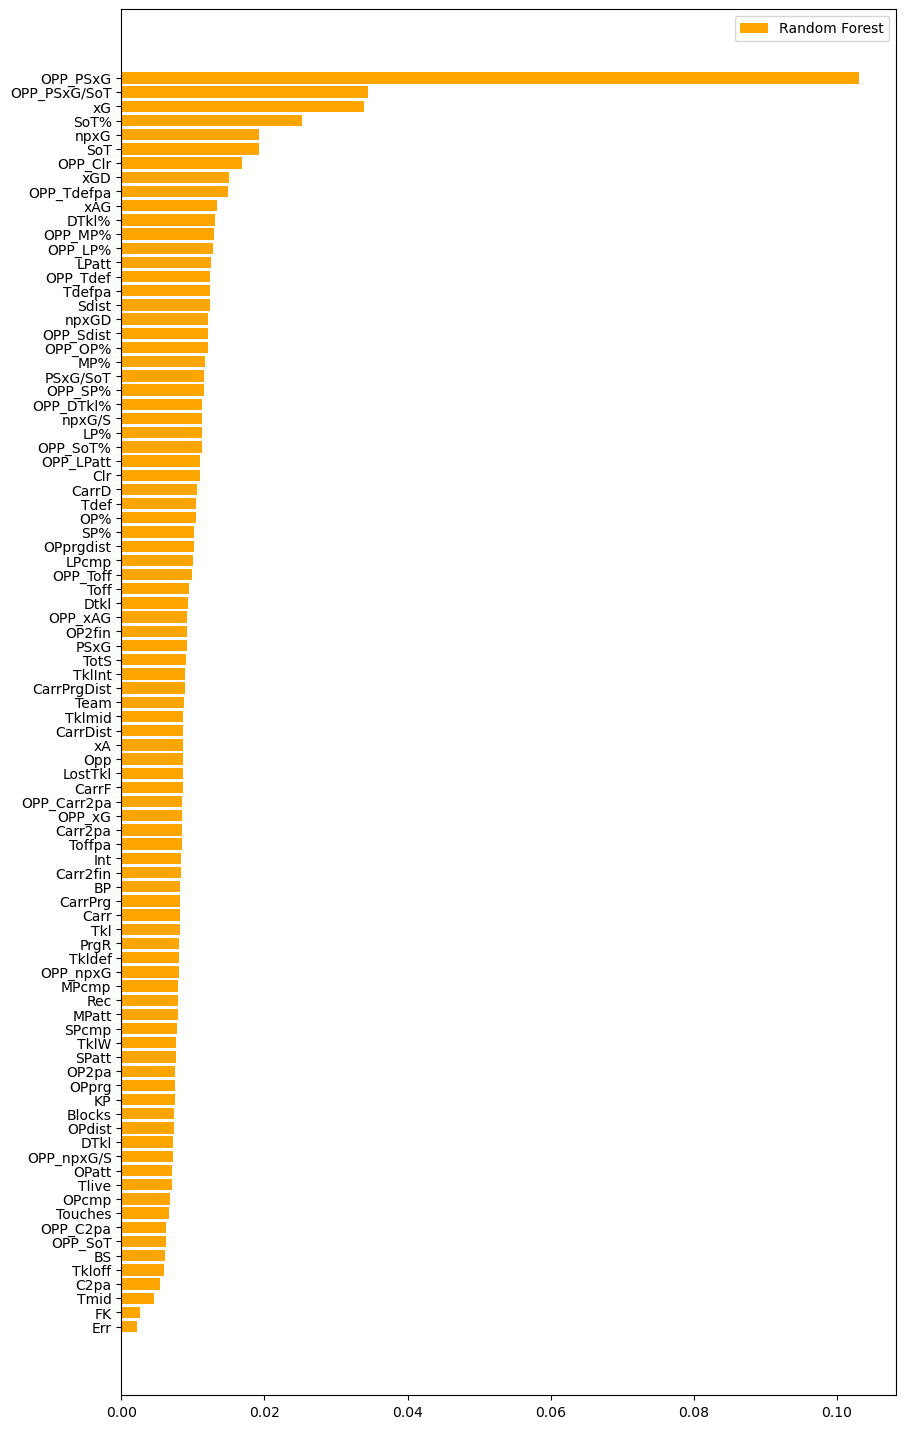

In [30]:
feature_importance_opp = pd.DataFrame({'rfc':rfc_opp.feature_importances_},index = df_EPL_opp.drop(columns=['Date', 'Result',
                                  'GF', 'GA', 'GD', 'G-PG', 'PG', 'PKatt','PKm', 'G-xG', 'npG-npxG', 'A-xAG', 'PSxG-GA',
                                  'G/S', 'G/SoT', 'Poss']).columns)
feature_importance_opp.sort_values('rfc',ascending = True,inplace = True)

index = np.arange(len(feature_importance_opp))
fig, ax = plt.subplots(figsize = (10,18))
rfc_feature_opp = ax.barh(index, feature_importance_opp['rfc'], color = 'orange', label = 'Random Forest')
ax.set(yticks = index , yticklabels = feature_importance_opp.index)

ax.legend()
plt.savefig("myImagePDF_opp.pdf", format="pdf", bbox_inches="tight")
plt.show()

# GAME SIMULATION

In [31]:
feature_importance_opp[-30:].index

Index(['CarrD', 'Clr', 'OPP_LPatt', 'OPP_SoT%', 'LP%', 'npxG/S', 'OPP_DTkl%',
       'OPP_SP%', 'PSxG/SoT', 'MP%', 'OPP_OP%', 'OPP_Sdist', 'npxGD', 'Sdist',
       'Tdefpa', 'OPP_Tdef', 'LPatt', 'OPP_LP%', 'OPP_MP%', 'DTkl%', 'xAG',
       'OPP_Tdefpa', 'xGD', 'OPP_Clr', 'SoT', 'npxG', 'SoT%', 'xG',
       'OPP_PSxG/SoT', 'OPP_PSxG'],
      dtype='object')

In [32]:
def teamFiles(team, seasons, league):
    tmp=pd.DataFrame()
    for i in seasons:
        df= pd.read_csv(f"./{league}_teams_{i}/{team}.csv", sep = ",") 
        tmp= pd.concat ([tmp, df], ignore_index=True)
    return tmp

teamFiles('Arsenal', ['1920', '2021', '2122', '2223'], 'EPL')

,Rk,Team,Date,Opp,Comp,Result,GF,GA,GD,Poss,...,TotDist.1,PrgDist.1,PrgC,1/3.1,CPA,Mis,Dis,Rec,PrgR,Match Report
0,1,Arsenal,2020-07-26,Watford,eng Premier League,W 3-2,3,2,1,50,...,2187,1238,24,14,4,13,1,384,38,Match Report
1,2,Arsenal,2020-07-21,Aston Villa,eng Premier League,L 0-1,0,1,-1,69,...,2851,1591,25,18,4,10,12,563,59,Match Report
2,3,Arsenal,2020-07-15,Liverpool,eng Premier League,W 2-1,2,1,1,32,...,961,458,5,5,0,7,4,197,12,Match Report
3,4,Arsenal,2020-07-12,Tottenham,eng Premier League,L 1-2,1,2,-1,62,...,2923,1690,24,19,3,9,19,580,56,Match Report
4,5,Arsenal,2020-07-07,Leicester City,eng Premier League,D 1-1,1,1,0,39,...,1366,558,13,11,4,17,8,252,36,Match Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,34,Arsenal,2022-08-31,Aston Villa,eng Premier League,W 2-1,2,1,1,59,...,2049,1016,23,19,7,18,9,450,50,Match Report
148,35,Arsenal,2022-08-27,Fulham,eng Premier League,W 2-1,2,1,1,71,...,2351,1277,17,18,8,15,15,529,63,Match Report
149,36,Arsenal,2022-08-20,Bournemouth,eng Premier League,W 3-0,3,0,3,57,...,2454,1049,14,19,3,16,9,528,35,Match Report
150,37,Arsenal,2022-08-13,Leicester City,eng Premier League,W 4-2,4,2,2,50,...,1990,1009,23,19,9,12,7,405,29,Match Report


In [33]:
def teamDF(team, df):
    return df[df.Team == team].drop(columns=['Result', 'GF', 'GA', 'GD', 'G-PG', 'PG', 'PKatt',
                                    'PKm', 'G-xG', 'npG-npxG', 'A-xAG', 'PSxG-GA', 'G/S', 'G/SoT', 'Poss'], axis=1).reset_index(drop=True)

teamDF('Fulham', df_EPL_opp)

,Team,Date,Opp,OPcmp,OPatt,OP%,KP,OP2fin,OP2pa,C2pa,...,OPP_MP%,OPP_LPatt,OPP_Sdist,OPP_DTkl%,OPP_OP%,OPP_SP%,OPP_Tdef,OPP_Toff,OPP_LP%,OPP_Carr2pa
0,Fulham,2023-05-28,Manchester Utd,381,460,82.8,7,20,12,4,...,89.9,47.0,20.7,50.0,82.9,88.9,185.0,166.0,46.8,8.0
1,Fulham,2023-05-20,Crystal Palace,294,404,72.8,8,17,9,1,...,89.9,68.0,16.9,45.5,76.5,83.1,172.0,125.0,45.6,6.0
2,Fulham,2023-05-13,Southampton,575,671,85.7,9,35,10,1,...,87.1,42.0,24.2,37.5,76.6,84.0,157.0,100.0,40.5,2.0
3,Fulham,2023-05-08,Leicester City,442,550,80.4,15,32,8,1,...,81.3,67.0,20.9,60.0,75.4,90.3,179.0,137.0,43.3,7.0
4,Fulham,2023-05-03,Liverpool,404,494,81.8,7,32,9,3,...,89.8,83.0,22.6,35.7,83.3,90.7,193.0,230.0,56.6,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Fulham,2020-10-18,Sheffield Utd,505,606,83.3,12,26,7,4,...,82.7,57.0,20.1,34.8,77.2,85.5,129.0,136.0,43.9,6.0
72,Fulham,2020-10-04,Wolves,490,580,84.5,8,33,7,3,...,89.6,68.0,19.5,16.7,84.0,92.7,183.0,131.0,51.5,4.0
73,Fulham,2020-09-28,Aston Villa,493,605,81.5,13,47,12,8,...,86.1,88.0,14.5,38.9,70.4,81.1,214.0,109.0,48.9,7.0
74,Fulham,2020-09-19,Leeds United,380,480,79.2,9,24,10,3,...,82.7,84.0,16.9,31.0,74.2,82.5,245.0,121.0,54.8,3.0


In [40]:
def gameSim_last10(home, away, df, rfc):
    
    df_home = teamDF(home, df)
    df_away = teamDF(away, df)
    
    sim = pd.DataFrame(columns=['Team', 'Opp', 'OPcmp', 'OPatt', 'OP%', 'KP', 'OP2fin', 'OP2pa',
       'C2pa', 'OPprg', 'OPdist', 'OPprgdist', 'SPcmp', 'SPatt', 'SP%',
       'MPcmp', 'MPatt', 'MP%', 'LPcmp', 'LPatt', 'LP%', 'Tkl', 'TklW',
       'Tkldef', 'Tklmid', 'Tkloff', 'DTkl', 'Dtkl', 'DTkl%', 'LostTkl',
       'Blocks', 'BS', 'BP', 'Int', 'TklInt', 'Clr', 'Err', 'xG', 'npxG',
       'xGD', 'npxGD', 'xAG', 'xA', 'npxG/S', 'TotS', 'SoT', 'SoT%', 'Sdist',
       'FK', 'PSxG', 'PSxG/SoT', 'Touches', 'Tdefpa', 'Tdef', 'Tmid', 'Toff',
       'Toffpa', 'Tlive', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg',
       'Carr2fin', 'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR', 'OPP_xG', 'OPP_npxG', 'OPP_PSxG',
       'OPP_SoT%', 'OPP_PSxG/SoT', 'OPP_Clr', 'OPP_xAG', 'OPP_SoT',
       'OPP_Tdefpa', 'OPP_npxG/S', 'OPP_C2pa', 'OPP_MP%', 'OPP_LPatt',
       'OPP_Sdist', 'OPP_DTkl%', 'OPP_OP%', 'OPP_SP%', 'OPP_Tdef', 'OPP_Toff',
       'OPP_LP%', 'OPP_Carr2pa'])
    
    sim.loc[0, 'Team'] = home
    sim.loc[0, 'Opp'] = away
    
    awaycols = ['OPP_xG', 'OPP_npxG', 'OPP_PSxG', 'OPP_SoT%', 'OPP_PSxG/SoT', 'OPP_Clr', 'OPP_xAG', 'OPP_SoT', 
                'OPP_Tdefpa', 'OPP_npxG/S', 'OPP_C2pa', 'OPP_MP%', 'OPP_LPatt',
                'OPP_Sdist', 'OPP_DTkl%', 'OPP_OP%', 'OPP_SP%', 'OPP_Tdef', 'OPP_Toff',
                'OPP_LP%', 'OPP_Carr2pa']
    
    homecols = ['OPcmp', 'OPatt', 'OP%', 'KP', 'OP2fin', 'OP2pa',
       'C2pa', 'OPprg', 'OPdist', 'OPprgdist', 'SPcmp', 'SPatt', 'SP%',
       'MPcmp', 'MPatt', 'MP%', 'LPcmp', 'LPatt', 'LP%', 'Tkl', 'TklW',
       'Tkldef', 'Tklmid', 'Tkloff', 'DTkl', 'Dtkl', 'DTkl%', 'LostTkl',
       'Blocks', 'BS', 'BP', 'Int', 'TklInt', 'Clr', 'Err', 'xG', 'npxG',
       'xAG', 'xA', 'npxG/S', 'TotS', 'SoT', 'SoT%', 'Sdist',
       'FK', 'PSxG', 'PSxG/SoT', 'Touches', 'Tdefpa', 'Tdef', 'Tmid', 'Toff',
       'Toffpa', 'Tlive', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg',
       'Carr2fin', 'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR']
    
    bothcols = ['xGD', 'npxGD']
    
    for i in homecols:
        sim.loc[0, i] = df_home.loc[:10, i].mean()
    
    for i in awaycols:
        sim.loc[0, i] = df_away.loc[:10, i[4:]].mean()
        
    sim.loc[0, 'xGD'] = sim.loc[0, 'xG'] - sim.loc[0, 'OPP_xG']
    sim.loc[0, 'npxGD'] = sim.loc[0, 'npxG'] - sim.loc[0, 'OPP_npxG']
    
    sim = encoder.transform(sim)
    sim = sta.transform(sim)
    
    return rfc.predict_proba(sim)

In [53]:
gameSim_last10('Arsenal', 'Wolves', df_EPL_opp, rfc_opp)

array([[0.01, 0.31, 0.56, 0.1 , 0.01, 0.01, 0.  , 0.  , 0.  ]])

In [54]:
gameSim_last10('Wolves', 'Arsenal', df_EPL_opp, rfc_opp)

array([[0.13, 0.62, 0.23, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ]])